# Data Analysis
Will analyize and present data for visualization

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
# import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datautil as du
import holidays
import datetime

In [2]:
# Load and clean data
du.clean_data()

LOADING DATA FILES ../data/crime/2012_2016_CrimeRate.csv and ../data/crime/2007-2016-Homelessness-USA.csv


## Crimes on holidays

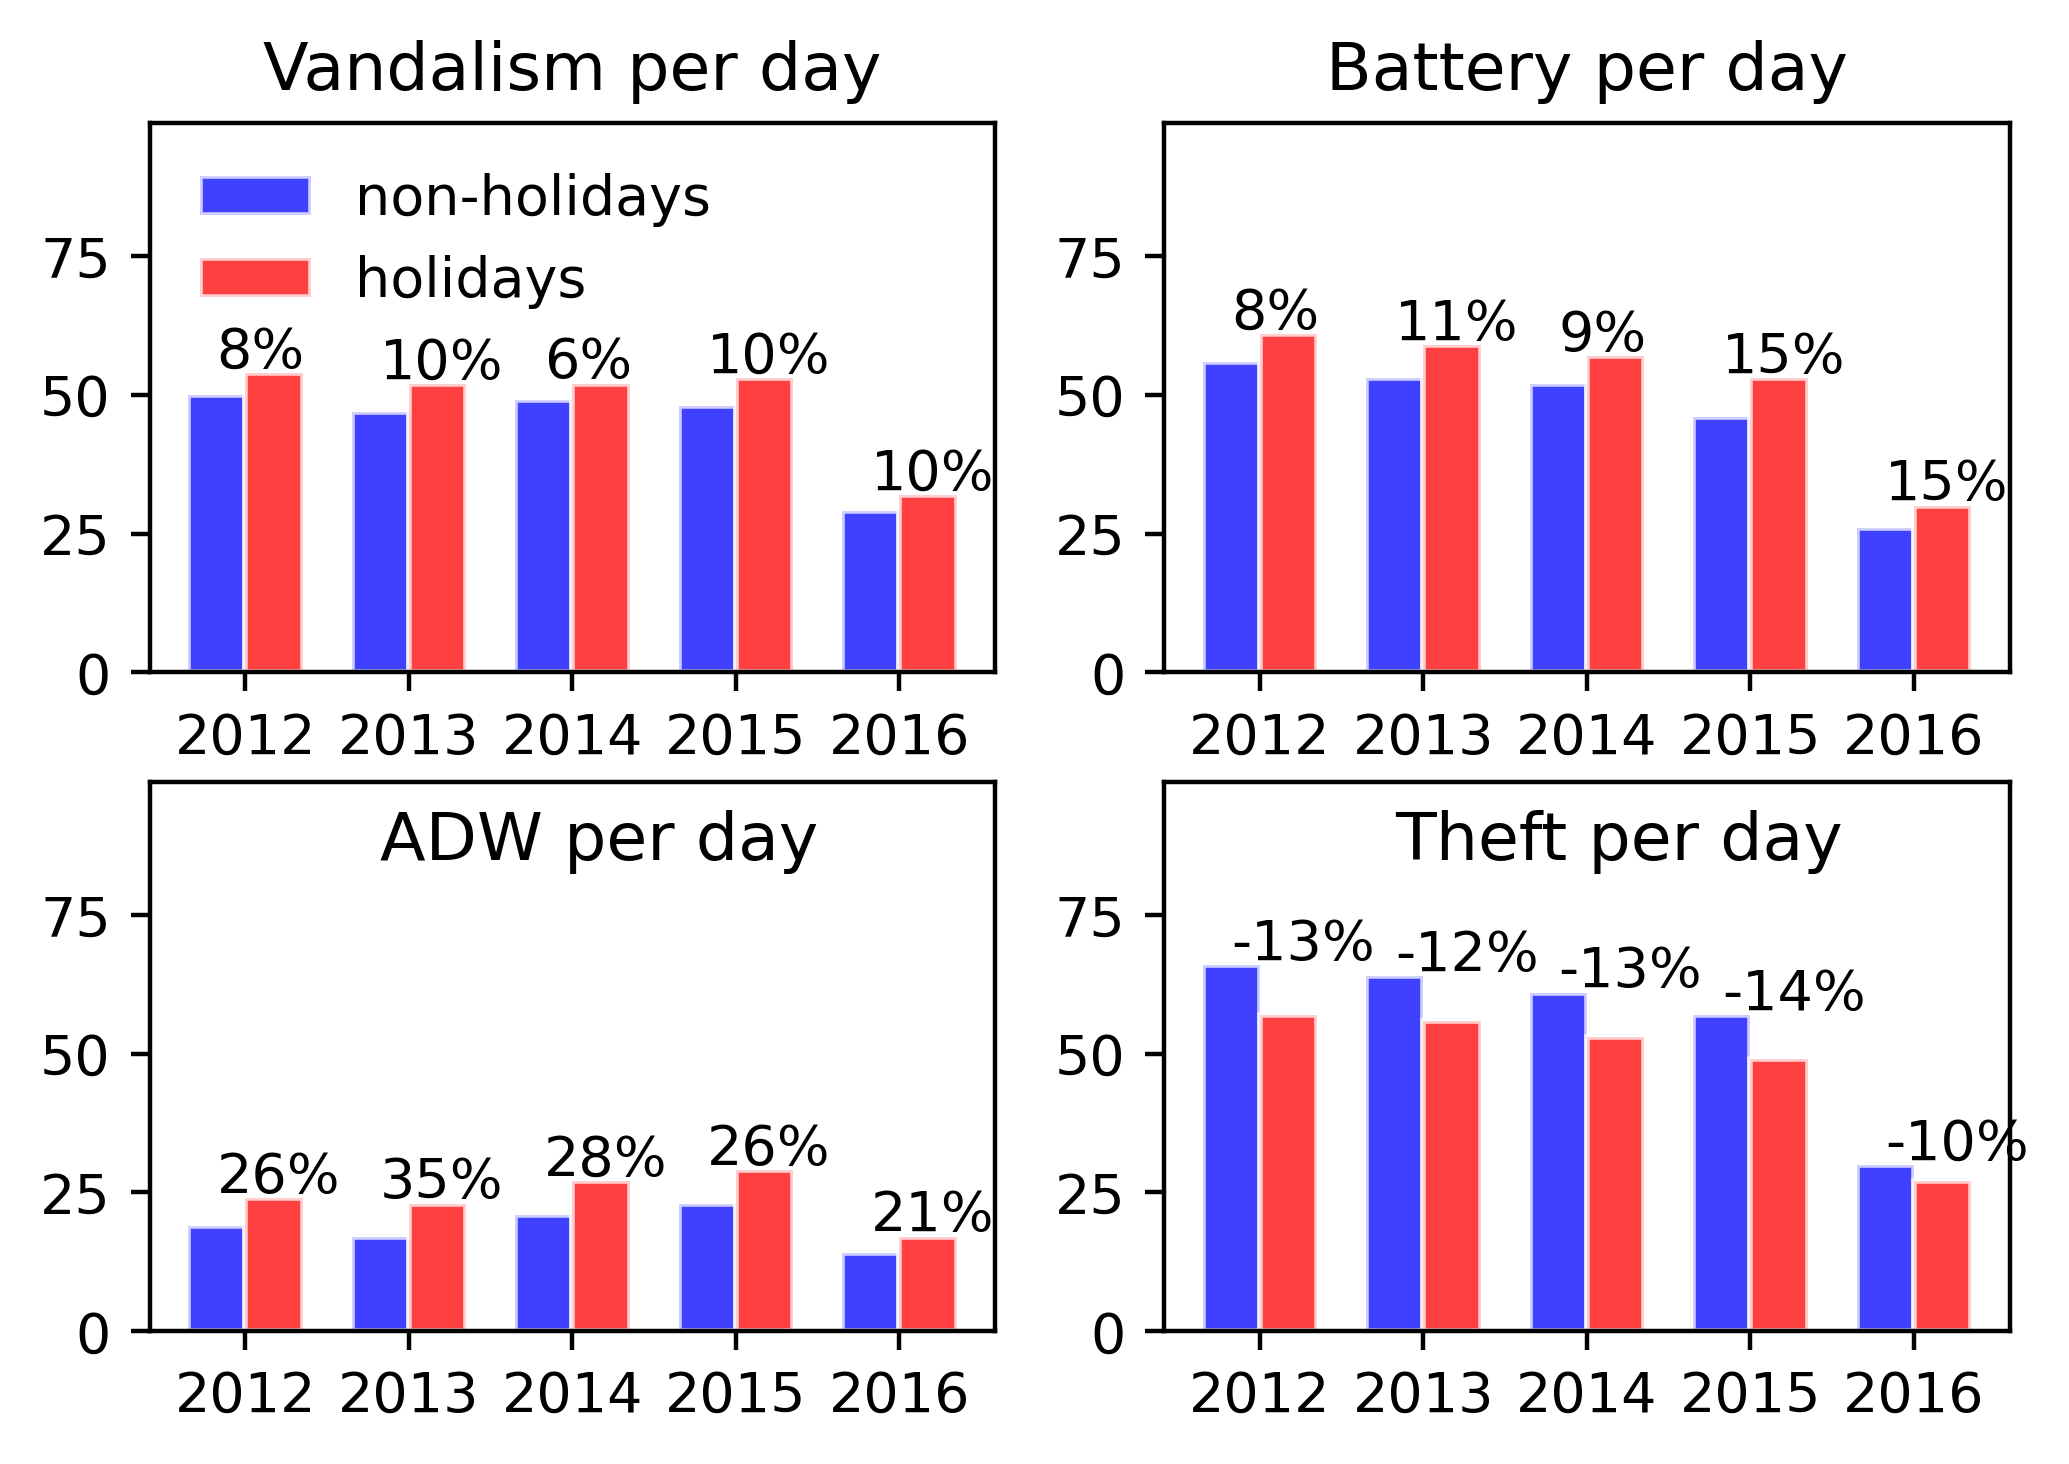

In [80]:
unique_crime_desc = du.clean_crime_data_df["Crime Description"].unique()
unique_years = du.clean_crime_data_df["Year of Crime"].unique()

barWidth = 0.35

r1 = np.arange(len(unique_years))
r2 = [x + barWidth for x in r1]

# Plotting both bars using the set x-axes and y-axes to make a mutli-bar plot to see
# potential correlation between crimes and homelessness.

fig, axes2d = plt.subplots(2,2, figsize=(6,4), dpi=400)

axes = axes2d.flatten()

for cix in range(len(unique_crime_desc)):
    crime_desc = unique_crime_desc[cix]
    # Calculate the number of crimes per each year that happened in holidays
    holi_per_year = np.zeros_like(unique_years)
    nonholi_per_year = np.zeros_like(unique_years)
    days_per_year = np.zeros_like(unique_years)
    crimes_on_holi_per_year = np.zeros_like(unique_years)
    crimes_on_nonholi_per_year = np.zeros_like(unique_years)
    change_per_year = np.zeros_like(unique_years, dtype=np.double)

    for yix in range(len(unique_years)):
        year = unique_years[yix]
        holi_per_year[yix] = len(holidays.US(years=[year], state="CA")) + 52*2
        days_per_year[yix] = (datetime.date(year+1,1,1) - datetime.date(year,1,1)).days
        nonholi_per_year[yix] = days_per_year[yix] - holi_per_year[yix]

        # Choose the df that contains the years
        filter_year = np.bitwise_and(du.clean_crime_data_df["Year of Crime"] == year, 
                                     du.clean_crime_data_df["Crime Description"] == crime_desc)

        # Calculate crimes per holiday on each year
        crimes_on_holi_per_year[yix] = du.clean_crime_data_df[filter_year]["Holiday"].sum()/holi_per_year[yix]
        crimes_on_nonholi_per_year[yix] = (du.clean_crime_data_df[filter_year]["Holiday"] == False).sum()/nonholi_per_year[yix]
        # Percent change between holidays and non-holidays
        change_per_year[yix] = np.double(crimes_on_holi_per_year[yix] - crimes_on_nonholi_per_year[yix])/crimes_on_nonholi_per_year[yix]
        
    ax = axes[cix]
    ax.bar(r1, crimes_on_nonholi_per_year, color = 'blue', alpha = 0.75, width = barWidth, edgecolor = 'white', label = 'non-holidays')
    ax.bar(r2, crimes_on_holi_per_year, color = 'red', alpha = 0.75, width = barWidth, edgecolor = 'white', label = 'holidays')

    # Created a title, legend and axes labels for multi-bar plot.  Labeled the x tickmarks as the years and
    # set their location in between the two bars for each year.
    if cix < 2:
        ax.set_title(f'{crime_desc} per day')
    else:
        ax.text(1,85, f'{crime_desc} per day', fontsize=12)
    ax.set_xticks([r + (barWidth/2) for r in range(len(unique_years))])
    ax.set_xticklabels(unique_years)
    if cix == 0:
        ax.legend(loc='upper left', frameon = False)
        
    ax.set_ylim(0,99)
    
    for yix in range(len(unique_years)):
        yloc = max(crimes_on_holi_per_year[yix],
                  crimes_on_nonholi_per_year[yix])
        ax.text(r1[yix],yloc + 1, 
                "%d%%" % (change_per_year[yix]*100),
                fontsize=10)

    
output_image = f'../output/Crimes_on_Holidays_per_year.jpg'
fig.savefig(output_image)

## Crime for each month

<AxesSubplot:xlabel='Month of Crime'>

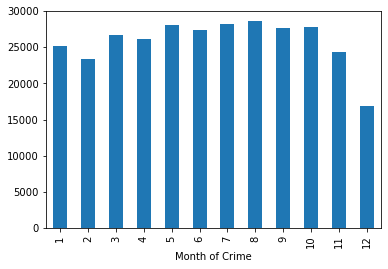

In [91]:
du.clean_crime_data_df.groupby("Month of Crime").count()["Date Reported"].plot(kind="bar")

In [ ]:
# Grouping data by the crime description and counting to get the total amount each crime type
# had been committed over the five years.  Putting those counts into a list for plotting as y-axis.
# Also putting the index (Crime Descriptions) in a list as the x-axis for plotting.

crime_type_count = du.clean_crime_data_df.groupby('Crime Description')['Crime Code'].count()
crime_counts = crime_type_count.to_list()
x_axis = crime_type_count.index.to_list()

# Plotting bar graph of the number of crimes committed per crime type over the five year span.
# Setting limits for cleaner presentation.

plt.bar(x_axis, crime_counts, color = 'skyblue',  alpha = 0.5, align = 'center')

plt.xlim(-0.55, len(x_axis) - 0.45)
plt.ylim(0, max(crime_counts) + 3000)

# Adding plot titles and axis labels.

plt.title("Number of Crimes per Crime Type in LA County from 2012-2016")
plt.xlabel("Crime Types")
plt.ylabel("Number of Crimes")

# Setting output location and name for png of plot.

output_image = f'../output/Num_Crimes_Bar_2012_2016.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

In [ ]:
# Setting arbitrary colors and plotting a pie chart of the same data showing the % amount of each crime type committed.

colors = ["hotpink", "green", "orange", "purple"]
plt.pie(crime_counts, labels = x_axis, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title("Number of Crimes per Crime Type in LA County from 2012-2016")

# Setting output location and name for png of plot.

output_image = f'../output/Num_Crimes_Pie_2012_2016.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

In [ ]:
# Grouped by the crime type and year crime occurred to get a count of the amount of times each crime was committed per year.

crime_types_counts_per_year = du.clean_crime_data_df.groupby(['Crime Description', 'Year of Crime'])['Crime Code'].count()

# Set colors for bars in the mutli-bar plot and unstacked the data in the series to create bar plot.

colors = ['firebrick', 'goldenrod', 'blue', 'green', 'purple']

crime_types_counts_per_year.unstack().plot.bar(rot = 0, color = colors, width = 0.75)

# Adding plot titles and axis labels.

plt.title('Count of Crime Types per Year in LA County 2012 thru 2016 Comparison')
plt.xlabel('Crime Types')
plt.ylabel('Count')
plt.legend(title = 'Year', frameon = False)

# Setting output location and name for png of plot.

output_image = f'../output/Num_Crimes_2012_2016_per_year.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

In [ ]:
# Grouped data by the year the crime occurred and counted how many total crimes were committed each year
# which was then put into a list for plotting.

crimes_per_year = du.clean_crime_data_df.groupby('Year of Crime')['Crime Description'].count()
crime_counts_per_year = crimes_per_year.to_list()
homeless_counts_fixed = du.homeless_counts()

# Width of bars set for cleaner plot presentation, created a list of the length of crime count list (number of years)
# to be set as the x_axis for the crime count data.  Calculation made to place second set of x-axis locations for homeless
# counts so multiple bars can be placed adjacent to one another in one plot.

barWidth = 0.35

r1 = np.arange(len(crime_counts_per_year))
r2 = [x + barWidth for x in r1]

# y-axes set as the list of the crime counts for one and the other the pulled homeless counts from earlier dataframe.

y_axis_crimes = crime_counts_per_year
y_axis_homeless = homeless_counts_fixed['Count'].astype(int).to_list()

# Plotting both bars using the set x-axes and y-axes to make a mutli-bar plot to see
# potential correlation between crimes and homelessness.

plt.bar(r1, y_axis_crimes, color = 'red', alpha = 0.75, width = barWidth, edgecolor = 'white', label = 'crimes')
plt.bar(r2, y_axis_homeless, color = 'blue', alpha = 0.75, width = barWidth, edgecolor = 'white', label = 'homeless')

# Created a title, legend and axes labels for multi-bar plot.  Labeled the x tickmarks as the years and
# set their location in between the two bars for each year.

plt.title('Count of Crimes vs Count of Homeless in LA County Between 2012 and 2016')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks([r + (barWidth/2) for r in range(len(crime_counts_per_year))], ['2012', '2013', '2014', '2015', '2016'])
plt.legend(loc='upper right', title='Count Type', frameon = False)

# Setting output location and name for png of plot. 

output_image = f'../output/Crime_Homeless_Compare_Bar_2012_2016.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

In [ ]:
# Setting x axis to be the years, plotting two lines to see the potential correlation in a different way.
x_axis_line = ['2012', '2013', '2014', '2015', '2016']

plt.plot(x_axis_line, y_axis_crimes, marker = 'o', markerfacecolor = 'red', markersize = 12, color = 'red', linewidth = 4, label = 'crimes')
plt.plot(x_axis_line, y_axis_homeless, marker = 'd', markerfacecolor = 'blue', markersize = 12, color = 'blue', linewidth = 4, label = 'homeless')

# Created a title, legend, and axes labels.
plt.title('Count of Crimes vs Count of Homeless in LA County Between 2012 and 2016')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc = 'center left', title = 'Count Type', frameon = False, ncol = 2)
plt.grid()

# Setting output location and name for png of plot.
output_image = f'../output/Crime_Homeless_Compare_Line_2012_2016.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

In [ ]:
# Histogram of the number of crimes over the day for the time period of 2012-2016
plt.hist(du.clean_crime_data_df['Time Occurred'], bins=24)
plt.title('Histogram of Crimes During Time Blocks of the day in LA County Between 2012 and 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Time Block (1 hour)')

# Setting output location and name for png of plot.
output_image = f'../output/Crime_Hist_Hourly_2012_2016.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

In [ ]:
# Histogram of the number of crimes over the day for the time period of 2012-2016
plt.hist(du.clean_crime_data_df.loc[du.clean_crime_data_df['Crime Description'] == 'ADW']['Time Occurred'], bins=24)
plt.title('Histogram of ADW Crimes During Time Blocks of the day in LA County Between 2012 and 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Time Block (1 hour)')

# Setting output location and name for png of plot.
output_image = f'../output/Crime_Hist_ADW_2012_2016.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

In [ ]:
# Histogram of the number of crimes over the day for the time period of 2012-2016
plt.hist(du.clean_crime_data_df.loc[du.clean_crime_data_df['Crime Description'] == 'Theft']['Time Occurred'], bins=24)
plt.title('Histogram of Theft Crimes During Time Blocks of the day in LA County Between 2012 and 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Time Block (1 hour)')

# Setting output location and name for png of plot.
output_image = f'../output/Crime_Hist_Theft_2012_2016.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

In [ ]:
# Histogram of the number of crimes over the day for the time period of 2012-2016
plt.hist(du.clean_crime_data_df.loc[du.clean_crime_data_df['Crime Description'] == 'Battery']['Time Occurred'], bins=24)
plt.title('Histogram of Battery Crimes During Time Blocks of the day in LA County Between 2012 and 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Time Block (1 hour)')

# Setting output location and name for png of plot.
output_image = f'../output/Crime_Hist_Battery_2012_2016.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

In [ ]:
# Histogram of the number of crimes over the day for the time period of 2012-2016
plt.hist(du.clean_crime_data_df.loc[du.clean_crime_data_df['Crime Description'] == 'Vandalism']['Time Occurred'], bins=24)
plt.title('Histogram of Vandalism Crimes During Time Blocks of the day in LA County Between 2012 and 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Time Block (1 hour)')

# Setting output location and name for png of plot.
output_image = f'../output/Crime_Hist_Vandalism_2012_2016.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

In [ ]:
# Histogram of the number of crimes over each month
